<h3>Testing Notebook</h3>

In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [3]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
replicas, size = 2, 1288 # replicated

In [4]:
from core.getdata import *
from core.dataset import *
from core.dataset2 import *

<h3>Example of GetData</h3>

In [5]:
TNFib1 = GetData(ligands[0], "", replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [6]:
data = DatasetNaive(ligands, replicas, size) #naive macrophages

In [7]:
%%time
for _ in data:
    pass

Wall time: 7.01 ms


In [8]:
data.data.shape

(11592, 98, 1)

In [9]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(data.labels, data.labels.shape)

[0 0 0 ... 8 8 8] (11592,)


<h3>Initializing Dataloaders</h3>

In [11]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

10432 1159 9388 1043
11591 11592


In [13]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [14]:
data.data[1000].shape
len(data)

11592

In [15]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len+1]) # still np arrays

In [16]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [17]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

163 19 182


<h3>Model Training</h3>

In [18]:
from core.network import *
from core.trainer import *

In [19]:
torch.cuda.is_available()

True

In [20]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 100
batch_size = 64
learning_rate = 1e-3

In [21]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [22]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [23]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|▊                                                                                 | 1/100 [00:02<04:19,  2.62s/it]

Epoch 001: | Training Loss: 2.1530452315792714 | Validation Loss: 2.081922926400837


  2%|█▋                                                                                | 2/100 [00:04<03:29,  2.14s/it]

Epoch 002: | Training Loss: 2.0753482967797963 | Validation Loss: 2.094847001527485


  3%|██▍                                                                               | 3/100 [00:06<03:12,  1.99s/it]

Epoch 003: | Training Loss: 2.0187729933510528 | Validation Loss: 2.1502009567461515


  4%|███▎                                                                              | 4/100 [00:08<03:04,  1.92s/it]

Epoch 004: | Training Loss: 2.0433007924834645 | Validation Loss: 2.0198929623553625


  5%|████                                                                              | 5/100 [00:09<02:58,  1.88s/it]

Epoch 005: | Training Loss: 1.9618935972635 | Validation Loss: 1.940483664211474


  6%|████▉                                                                             | 6/100 [00:11<02:53,  1.84s/it]

Epoch 006: | Training Loss: 1.9415966272354126 | Validation Loss: 1.999463438987732


  7%|█████▋                                                                            | 7/100 [00:13<02:49,  1.82s/it]

Epoch 007: | Training Loss: 1.9508942043854416 | Validation Loss: 1.9539849381697805


  8%|██████▌                                                                           | 8/100 [00:15<02:46,  1.81s/it]

Epoch 008: | Training Loss: 1.9440485473059437 | Validation Loss: 1.9541607467751754


  9%|███████▍                                                                          | 9/100 [00:16<02:43,  1.80s/it]

Epoch 009: | Training Loss: 1.9528776531570529 | Validation Loss: 1.9496178815239353


 10%|████████                                                                         | 10/100 [00:18<02:41,  1.79s/it]

Epoch 010: | Training Loss: 1.9442470256536284 | Validation Loss: 1.9478663833517778


 11%|████████▉                                                                        | 11/100 [00:20<02:39,  1.80s/it]

Epoch 011: | Training Loss: 2.1508558045135686 | Validation Loss: 2.117042240343596


 12%|█████████▋                                                                       | 12/100 [00:22<02:37,  1.79s/it]

Epoch 012: | Training Loss: 2.0630528707445763 | Validation Loss: 1.9764985536274158


 13%|██████████▌                                                                      | 13/100 [00:24<02:35,  1.79s/it]

Epoch 013: | Training Loss: 1.960257027046812 | Validation Loss: 1.8597644253780967


 14%|███████████▎                                                                     | 14/100 [00:25<02:33,  1.79s/it]

Epoch 014: | Training Loss: 1.8644211526297352 | Validation Loss: 2.0665195050992464


 15%|████████████▏                                                                    | 15/100 [00:27<02:31,  1.79s/it]

Epoch 015: | Training Loss: 1.824191525669917 | Validation Loss: 1.809595220967343


 16%|████████████▉                                                                    | 16/100 [00:29<02:29,  1.78s/it]

Epoch 016: | Training Loss: 1.76644403583433 | Validation Loss: 1.8050596337569387


 17%|█████████████▊                                                                   | 17/100 [00:31<02:27,  1.78s/it]

Epoch 017: | Training Loss: 1.7405546793908429 | Validation Loss: 1.6578529320265118


 18%|██████████████▌                                                                  | 18/100 [00:33<02:26,  1.78s/it]

Epoch 018: | Training Loss: 1.651985257681162 | Validation Loss: 1.707135928304572


 19%|███████████████▍                                                                 | 19/100 [00:34<02:24,  1.78s/it]

Epoch 019: | Training Loss: 1.6000236316692609 | Validation Loss: 1.54022122684278


 20%|████████████████▏                                                                | 20/100 [00:36<02:22,  1.78s/it]

Epoch 020: | Training Loss: 1.488589212206975 | Validation Loss: 1.439260062418486


 21%|█████████████████                                                                | 21/100 [00:38<02:21,  1.79s/it]

Epoch 021: | Training Loss: 1.39105953395001 | Validation Loss: 1.377810183324312


 22%|█████████████████▊                                                               | 22/100 [00:40<02:19,  1.78s/it]

Epoch 022: | Training Loss: 1.4239438611305564 | Validation Loss: 1.3547797767739547


 23%|██████████████████▋                                                              | 23/100 [00:41<02:17,  1.79s/it]

Epoch 023: | Training Loss: 1.2929833498469159 | Validation Loss: 1.2374321143878133


 24%|███████████████████▍                                                             | 24/100 [00:43<02:17,  1.81s/it]

Epoch 024: | Training Loss: 1.2325040098348279 | Validation Loss: 1.1793063737844165


 25%|████████████████████▎                                                            | 25/100 [00:45<02:15,  1.80s/it]

Epoch 025: | Training Loss: 1.1976538410216022 | Validation Loss: 1.2525721976631565


 26%|█████████████████████                                                            | 26/100 [00:47<02:13,  1.80s/it]

Epoch 026: | Training Loss: 1.1522098721170717 | Validation Loss: 1.1604283734371788


 27%|█████████████████████▊                                                           | 27/100 [00:49<02:14,  1.85s/it]

Epoch 027: | Training Loss: 1.1270293092435122 | Validation Loss: 1.2191975493180125


 28%|██████████████████████▋                                                          | 28/100 [00:51<02:12,  1.84s/it]

Epoch 028: | Training Loss: 1.0982201940442886 | Validation Loss: 1.125916245736574


 29%|███████████████████████▍                                                         | 29/100 [00:52<02:09,  1.83s/it]

Epoch 029: | Training Loss: 1.0757418132267116 | Validation Loss: 1.0782295402727629


 30%|████████████████████████▎                                                        | 30/100 [00:54<02:07,  1.83s/it]

Epoch 030: | Training Loss: 1.0246475327965672 | Validation Loss: 1.1522461050435115


 31%|█████████████████████████                                                        | 31/100 [00:56<02:08,  1.86s/it]

Epoch 031: | Training Loss: 1.0003914606351794 | Validation Loss: 1.1532662950064008


 32%|█████████████████████████▉                                                       | 32/100 [00:58<02:10,  1.91s/it]

Epoch 032: | Training Loss: 0.9724865508225798 | Validation Loss: 1.076154090856251


 33%|██████████████████████████▋                                                      | 33/100 [01:00<02:06,  1.89s/it]

Epoch 033: | Training Loss: 0.9493874212715523 | Validation Loss: 1.229942732735684


 34%|███████████████████████████▌                                                     | 34/100 [01:02<02:04,  1.88s/it]

Epoch 034: | Training Loss: 0.994048910638306 | Validation Loss: 1.0180556680026807


 35%|████████████████████████████▎                                                    | 35/100 [01:04<02:01,  1.87s/it]

Epoch 035: | Training Loss: 0.9093076641574228 | Validation Loss: 1.0480219941390188


 36%|█████████████████████████████▏                                                   | 36/100 [01:06<01:58,  1.85s/it]

Epoch 036: | Training Loss: 0.8824406116286669 | Validation Loss: 0.9834858461430198


 37%|█████████████████████████████▉                                                   | 37/100 [01:07<01:55,  1.84s/it]

Epoch 037: | Training Loss: 0.8367284364495541 | Validation Loss: 0.9914715321440446


 38%|██████████████████████████████▊                                                  | 38/100 [01:09<01:53,  1.83s/it]

Epoch 038: | Training Loss: 0.8201265035231421 | Validation Loss: 0.9715345909720973


 39%|███████████████████████████████▌                                                 | 39/100 [01:11<01:51,  1.82s/it]

Epoch 039: | Training Loss: 0.7854054679899859 | Validation Loss: 0.9561009563897785


 40%|████████████████████████████████▍                                                | 40/100 [01:13<01:48,  1.81s/it]

Epoch 040: | Training Loss: 0.7644192340549516 | Validation Loss: 0.9416598614893461


 41%|█████████████████████████████████▏                                               | 41/100 [01:15<01:46,  1.80s/it]

Epoch 041: | Training Loss: 0.7651541150786394 | Validation Loss: 0.9578556826240138


 42%|██████████████████████████████████                                               | 42/100 [01:16<01:44,  1.80s/it]

Epoch 042: | Training Loss: 0.7300404836795081 | Validation Loss: 0.8702692703196877


 43%|██████████████████████████████████▊                                              | 43/100 [01:18<01:42,  1.79s/it]

Epoch 043: | Training Loss: 0.684953889963817 | Validation Loss: 0.8209492266178131


 44%|███████████████████████████████████▋                                             | 44/100 [01:20<01:40,  1.79s/it]

Epoch 044: | Training Loss: 0.6679958158109817 | Validation Loss: 0.9280993922760612


 45%|████████████████████████████████████▍                                            | 45/100 [01:22<01:38,  1.79s/it]

Epoch 045: | Training Loss: 0.6649209063477312 | Validation Loss: 0.8575463232241178


 46%|█████████████████████████████████████▎                                           | 46/100 [01:24<01:36,  1.79s/it]

Epoch 046: | Training Loss: 0.6183763331065149 | Validation Loss: 0.8811632363419784


 47%|██████████████████████████████████████                                           | 47/100 [01:25<01:34,  1.78s/it]

Epoch 047: | Training Loss: 0.6200492484437907 | Validation Loss: 0.8445914701411599


 48%|██████████████████████████████████████▉                                          | 48/100 [01:27<01:32,  1.78s/it]

Epoch 048: | Training Loss: 0.6276750646851545 | Validation Loss: 0.8999160057619998


 49%|███████████████████████████████████████▋                                         | 49/100 [01:29<01:31,  1.79s/it]

Epoch 049: | Training Loss: 0.5924527848059414 | Validation Loss: 0.7814434625600514


 50%|████████████████████████████████████████▌                                        | 50/100 [01:31<01:29,  1.79s/it]

Epoch 050: | Training Loss: 0.532041103561963 | Validation Loss: 0.7945828218209116


 51%|█████████████████████████████████████████▎                                       | 51/100 [01:32<01:27,  1.79s/it]

Epoch 051: | Training Loss: 0.5373506068817677 | Validation Loss: 0.7551074004486987


 52%|██████████████████████████████████████████                                       | 52/100 [01:34<01:25,  1.79s/it]

Epoch 052: | Training Loss: 0.504162814536709 | Validation Loss: 0.7562698376806158


 53%|██████████████████████████████████████████▉                                      | 53/100 [01:36<01:23,  1.79s/it]

Epoch 053: | Training Loss: 0.4593309387107568 | Validation Loss: 0.7088077570262709


 54%|███████████████████████████████████████████▋                                     | 54/100 [01:38<01:22,  1.79s/it]

Epoch 054: | Training Loss: 0.4429027180364527 | Validation Loss: 0.7215056325259962


 55%|████████████████████████████████████████████▌                                    | 55/100 [01:40<01:20,  1.79s/it]

Epoch 055: | Training Loss: 0.5062685319068242 | Validation Loss: 0.7998704345602738


 56%|█████████████████████████████████████████████▎                                   | 56/100 [01:41<01:18,  1.79s/it]

Epoch 056: | Training Loss: 0.43766565191233814 | Validation Loss: 0.7236736918750563


 57%|██████████████████████████████████████████████▏                                  | 57/100 [01:43<01:16,  1.79s/it]

Epoch 057: | Training Loss: 0.405286788026248 | Validation Loss: 0.909224619990901


 58%|██████████████████████████████████████████████▉                                  | 58/100 [01:45<01:15,  1.79s/it]

Epoch 058: | Training Loss: 0.44503202440182854 | Validation Loss: 0.7479607556995592


 59%|███████████████████████████████████████████████▊                                 | 59/100 [01:47<01:13,  1.78s/it]

Epoch 059: | Training Loss: 0.41149211533230506 | Validation Loss: 0.7417008280754089


 60%|████████████████████████████████████████████████▌                                | 60/100 [01:49<01:11,  1.79s/it]

Epoch 060: | Training Loss: 0.35031906021701775 | Validation Loss: 0.7432602251830854


 61%|█████████████████████████████████████████████████▍                               | 61/100 [01:50<01:09,  1.78s/it]

Epoch 061: | Training Loss: 0.33274528402492315 | Validation Loss: 0.7980009003689414


 62%|██████████████████████████████████████████████████▏                              | 62/100 [01:52<01:07,  1.78s/it]

Epoch 062: | Training Loss: 0.3450990410670181 | Validation Loss: 0.9812516821058173


 63%|███████████████████████████████████████████████████                              | 63/100 [01:54<01:06,  1.79s/it]

Epoch 063: | Training Loss: 0.3826934975897608 | Validation Loss: 0.7838503341925772


 64%|███████████████████████████████████████████████████▊                             | 64/100 [01:56<01:04,  1.78s/it]

Epoch 064: | Training Loss: 0.36550670139994357 | Validation Loss: 0.8164090012249193


 65%|████████████████████████████████████████████████████▋                            | 65/100 [01:57<01:02,  1.78s/it]

Epoch 065: | Training Loss: 0.3012262926511238 | Validation Loss: 0.662816050021272


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [01:59<01:00,  1.79s/it]

Epoch 066: | Training Loss: 0.26198581775273283 | Validation Loss: 0.7229716605261752


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [02:01<00:58,  1.78s/it]

Epoch 067: | Training Loss: 0.34249858261068905 | Validation Loss: 0.6344475334412173


 68%|███████████████████████████████████████████████████████                          | 68/100 [02:03<00:57,  1.79s/it]

Epoch 068: | Training Loss: 0.26058526711961244 | Validation Loss: 0.7148514531160656


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [02:05<00:55,  1.79s/it]

Epoch 069: | Training Loss: 0.22819230239267 | Validation Loss: 0.7207352895485727


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [02:06<00:53,  1.79s/it]

Epoch 070: | Training Loss: 0.22179944644127886 | Validation Loss: 0.6407679429179743


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [02:08<00:51,  1.79s/it]

Epoch 071: | Training Loss: 0.1886074836451583 | Validation Loss: 0.6635902414196416


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [02:10<00:50,  1.79s/it]

Epoch 072: | Training Loss: 0.2029041636483801 | Validation Loss: 0.6618385314941406


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [02:12<00:48,  1.79s/it]

Epoch 073: | Training Loss: 0.2115660386582825 | Validation Loss: 0.6683165399651778


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [02:14<00:46,  1.78s/it]

Epoch 074: | Training Loss: 0.18765249263289516 | Validation Loss: 0.6648430228233337


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [02:15<00:44,  1.78s/it]

Epoch 075: | Training Loss: 0.21050724300321627 | Validation Loss: 0.7370338455626839


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [02:17<00:42,  1.78s/it]

Epoch 076: | Training Loss: 0.16961804836805613 | Validation Loss: 0.8451290679605383


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [02:19<00:41,  1.79s/it]

Epoch 077: | Training Loss: 0.25664085606855846 | Validation Loss: 0.6991037412693626


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [02:21<00:39,  1.79s/it]

Epoch 078: | Training Loss: 0.19881332286296446 | Validation Loss: 0.6602574173655165


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [02:22<00:37,  1.79s/it]

Epoch 079: | Training Loss: 0.15815887348783528 | Validation Loss: 0.6578023523876542


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [02:24<00:35,  1.79s/it]

Epoch 080: | Training Loss: 0.1346660388256509 | Validation Loss: 0.6522246458028492


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [02:26<00:34,  1.79s/it]

Epoch 081: | Training Loss: 0.13172383798412018 | Validation Loss: 0.7056021831537548


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [02:28<00:32,  1.79s/it]

Epoch 082: | Training Loss: 0.1069759376392774 | Validation Loss: 0.7237705431486431


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [02:30<00:30,  1.79s/it]

Epoch 083: | Training Loss: 0.15818594530956145 | Validation Loss: 0.6998333829013925


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [02:31<00:28,  1.79s/it]

Epoch 084: | Training Loss: 0.1908246681916933 | Validation Loss: 0.7360636952676272


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [02:33<00:26,  1.79s/it]

Epoch 085: | Training Loss: 0.35408716799657036 | Validation Loss: 0.8540592962189725


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [02:35<00:24,  1.79s/it]

Epoch 086: | Training Loss: 0.2197827950485645 | Validation Loss: 0.6385916977336532


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [02:37<00:23,  1.79s/it]

Epoch 087: | Training Loss: 0.11826243228707577 | Validation Loss: 0.6628908781628859


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [02:39<00:21,  1.79s/it]

Epoch 088: | Training Loss: 0.09406108368028161 | Validation Loss: 0.6323783272191098


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [02:40<00:19,  1.79s/it]

Epoch 089: | Training Loss: 0.05858205272559008 | Validation Loss: 0.687547082179471


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [02:42<00:17,  1.79s/it]

Epoch 090: | Training Loss: 0.05514229512402068 | Validation Loss: 0.665547566978555


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [02:44<00:16,  1.79s/it]

Epoch 091: | Training Loss: 0.1176321583748595 | Validation Loss: 0.7851693253768118


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [02:46<00:14,  1.79s/it]

Epoch 092: | Training Loss: 0.17830085282448244 | Validation Loss: 0.7843223198464042


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [02:48<00:12,  1.79s/it]

Epoch 093: | Training Loss: 0.12871594836741138 | Validation Loss: 0.6752583321772123


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [02:49<00:10,  1.79s/it]

Epoch 094: | Training Loss: 0.1129536771221212 | Validation Loss: 0.7004892230033875


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [02:51<00:08,  1.79s/it]

Epoch 095: | Training Loss: 0.09790913284144884 | Validation Loss: 0.7113042818872553


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [02:53<00:07,  1.79s/it]

Epoch 096: | Training Loss: 0.06728861672929459 | Validation Loss: 0.7446508438963639


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [02:55<00:05,  1.79s/it]

Epoch 097: | Training Loss: 0.06374508753830305 | Validation Loss: 0.736492207175807


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [02:56<00:03,  1.79s/it]

Epoch 098: | Training Loss: 0.5988077220901207 | Validation Loss: 0.8313351618616205


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [02:58<00:01,  1.79s/it]

Epoch 099: | Training Loss: 0.1830595271216214 | Validation Loss: 0.722717219277432


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:00<00:00,  1.81s/it]

Epoch 100: | Training Loss: 0.07791091023481514 | Validation Loss: 0.6146956501822722


<h3>Evaluation</h3>

In [24]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:1160]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.network(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [25]:
df

,y_pred,y_true
0,3,3
1,6,6
2,1,5
3,0,0
4,3,3
...,...,...
1155,1,1
1156,2,2
1157,5,5
1158,1,1


In [26]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/1160}')

 Accuracy: 0.8741379310344828


In [27]:
dir_save = '../models/'
trainer.save(dir_save + 'lstm.pth') # model trained on naive dataset

<h3>Plots</h3>

In [28]:
import matplotlib.pyplot as plt

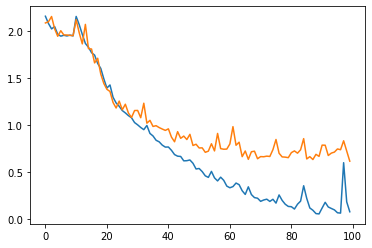

In [30]:
plt.plot(trainer.loss_history[0])
plt.plot(trainer.loss_history[1])

Overfitting occurs around ~90 epochs; slightly improved accuracy for naive vs polarized

<h3>Classification Report</h3>

In [31]:
# not a holistic look at the data

In [32]:
import sklearn.metrics

In [33]:
report = sklearn.metrics.classification_report(dic["y_true"], dic["y_pred"], target_names=ligands, output_dict=True)
rep = pd.DataFrame(report).transpose()

In [34]:
rep

,precision,recall,f1-score,support
TNF,0.852459,0.904348,0.877637,115.000000
R84,0.937984,0.889706,0.913208,136.000000
PIC,0.972727,0.930435,0.951111,115.000000
P3K,0.804511,0.877049,0.839216,122.000000
FLA,0.860140,0.848276,0.854167,145.000000
CpG,0.829457,0.798507,0.813688,134.000000
FSL,0.839695,0.785714,0.811808,140.000000
LPS,0.812500,0.850467,0.831050,107.000000
UST,0.953642,0.986301,0.969697,146.000000
accuracy,0.874138,0.874138,0.874138,0.874138


In [35]:
confusion = sklearn.metrics.confusion_matrix(dic["y_true"], dic["y_pred"])
plot = sklearn.metrics.ConfusionMatrixDisplay(confusion)

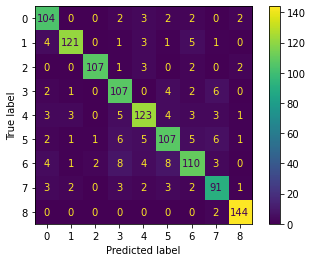

In [36]:
plot.plot()